In [39]:
import torch
from torch import nn
from torchvision import transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from tqdm import tqdm

In [40]:
train =  MNIST('/files/', train=True, download=True, transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]))
test =  MNIST('/files/', train=False, download=True, transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]))

train_loader = torch.utils.data.DataLoader(train, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test, batch_size=64, shuffle=True)

In [41]:
print(train.data.shape)

torch.Size([60000, 28, 28])


In [42]:
class MLP(nn.Module):
  '''
    Multilayer Perceptron.
  '''
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Flatten(),
      nn.Linear(28 * 28, 256),
      nn.ReLU(),
      nn.Linear(256, 128),
      nn.ReLU(),
      nn.Linear(128, 10),
    )


  def forward(self, x):
    '''Forward pass'''
    return self.layers(x)

In [50]:
torch.manual_seed(27)
mlp = MLP()

In [51]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mlp.parameters(), lr=1e-3)
n_epochs = 10
val_per_epoch = 1

In [52]:
def accuracy(yhat, y):
  pred_idx = yhat.max(1, keepdim=True)[1]
  correct = pred_idx.eq(y.view_as(pred_idx)).sum().item()
  return correct / len(y)

In [53]:
history = dict()
history['train_loss'] = list()
history['train_acc'] = list()
history['val_loss'] = list()
history['val_acc'] = list()

for epoch in range(n_epochs):
  running_loss = 0.0
  running_acc = 0
  mlp.train()

  for idx, (x, y) in enumerate(tqdm(train_loader)):
    optimizer.zero_grad()
    yhat = mlp(x)
    loss = loss_function(yhat, y)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    running_acc += accuracy(yhat, y)

  running_loss /= len(train_loader)
  running_acc /= len(train_loader)
  history['train_loss'].append(running_loss)
  history['train_acc'].append(running_acc)
  print(f"epoch = {epoch}\ttraining loss = {running_loss}\ttrainig accuracy = {running_acc}")

  if epoch % val_per_epoch == val_per_epoch - 1:
    running_loss = 0.0
    running_acc = 0
    mlp.train()
    with torch.no_grad():
      for idx, (x, y) in enumerate(tqdm(test_loader)):
        yhat = mlp(x)
        loss = loss_function(yhat, y)

        running_loss += loss.item()
        running_acc += accuracy(yhat, y)

      running_loss /= len(test_loader)
      running_acc /= len(test_loader)
      history['val_loss'].append(running_loss)
      history['val_acc'].append(running_acc)
      print(f"epoch = {epoch}\tvalidation loss = {running_loss}\tvalidation accuracy = {running_acc}")




100%|██████████| 938/938 [00:21<00:00, 44.22it/s]


epoch = 0	training loss = 0.23176576723175835	trainig accuracy = 0.9303538113006397


100%|██████████| 157/157 [00:02<00:00, 59.03it/s]


epoch = 0	validation loss = 0.13406805542244274	validation accuracy = 0.9581011146496815


100%|██████████| 938/938 [00:21<00:00, 43.77it/s]


epoch = 1	training loss = 0.09448888953633681	trainig accuracy = 0.9710321162046909


100%|██████████| 157/157 [00:02<00:00, 53.42it/s]


epoch = 1	validation loss = 0.08470318679976616	validation accuracy = 0.9722332802547771


100%|██████████| 938/938 [00:22<00:00, 42.00it/s]


epoch = 2	training loss = 0.0651654013472774	trainig accuracy = 0.9788612739872068


100%|██████████| 157/157 [00:02<00:00, 59.37it/s]


epoch = 2	validation loss = 0.07346065482421285	validation accuracy = 0.9772093949044586


100%|██████████| 938/938 [00:21<00:00, 44.56it/s]


epoch = 3	training loss = 0.05022918477100057	trainig accuracy = 0.9837420042643923


100%|██████████| 157/157 [00:02<00:00, 55.65it/s]


epoch = 3	validation loss = 0.0673515955394039	validation accuracy = 0.979796974522293


100%|██████████| 938/938 [00:20<00:00, 45.70it/s]


epoch = 4	training loss = 0.0401806513542932	trainig accuracy = 0.9867237473347548


100%|██████████| 157/157 [00:03<00:00, 45.50it/s]


epoch = 4	validation loss = 0.0772386026438207	validation accuracy = 0.9772093949044586


100%|██████████| 938/938 [00:20<00:00, 45.85it/s]


epoch = 5	training loss = 0.03296912691687722	trainig accuracy = 0.9885894189765458


100%|██████████| 157/157 [00:03<00:00, 51.62it/s]


epoch = 5	validation loss = 0.08580315995747877	validation accuracy = 0.976015127388535


100%|██████████| 938/938 [00:21<00:00, 44.08it/s]


epoch = 6	training loss = 0.02757879009522842	trainig accuracy = 0.9907216151385928


100%|██████████| 157/157 [00:02<00:00, 60.29it/s]


epoch = 6	validation loss = 0.09225965810051354	validation accuracy = 0.9753184713375797


100%|██████████| 938/938 [00:21<00:00, 43.69it/s]


epoch = 7	training loss = 0.027628775036262435	trainig accuracy = 0.9906882995735607


100%|██████████| 157/157 [00:02<00:00, 54.77it/s]


epoch = 7	validation loss = 0.07905812268916541	validation accuracy = 0.9804936305732485


100%|██████████| 938/938 [00:21<00:00, 42.79it/s]


epoch = 8	training loss = 0.021184011268743332	trainig accuracy = 0.9932702558635395


100%|██████████| 157/157 [00:02<00:00, 60.96it/s]


epoch = 8	validation loss = 0.08239010493336861	validation accuracy = 0.980593152866242


100%|██████████| 938/938 [00:21<00:00, 43.81it/s]


epoch = 9	training loss = 0.01990194081419394	trainig accuracy = 0.9939365671641791


100%|██████████| 157/157 [00:02<00:00, 60.63it/s]

epoch = 9	validation loss = 0.10088154094465741	validation accuracy = 0.9768113057324841


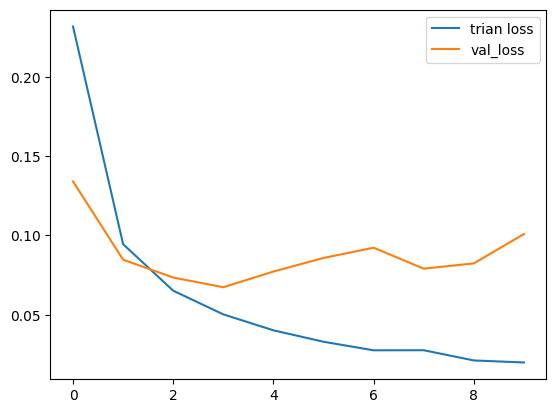

In [54]:
plt.plot(history['train_loss'], label='trian loss')
plt.plot(history['val_loss'], label='val_loss')
plt.legend()

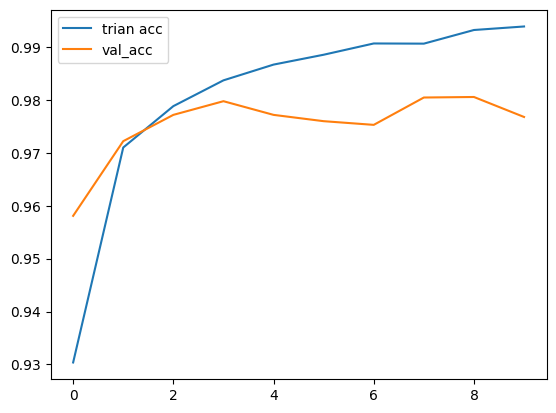

In [55]:
plt.plot(history['train_acc'], label='trian acc')
plt.plot(history['val_acc'], label='val_acc')
plt.legend()